In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
# read the data
data = pd.read_pickle("data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]
# normalize the responses
hf_responses_mean = hf_responses.mean().numpy()
hf_responses_std = hf_responses.std().numpy()
hf_responses_scaled = (hf_responses.clone() -
                       hf_responses_mean) / hf_responses_std

In [3]:
# load the trained models
with open("smf_bnn_lf1_50.pkl", "rb") as f:
    smf_bnn_lf1_50 = torch.load(f)

# load the trained models lf2
with open("smf_bnn_lf2_50.pkl", "rb") as f:
    smf_bnn_lf2_50 = torch.load(f)

# load the trained models lf3
with open("smf_bnn_lf3_50.pkl", "rb") as f:
    smf_bnn_lf3_50 = torch.load(f)

# load the trained models lf1 512
with open("smf_bnn_lf1_512.pkl", "rb") as f:
    smf_bnn_lf1_512 = torch.load(f)

# load the trained models lf2 512
with open("smf_bnn_lf2_512.pkl", "rb") as f:
    smf_bnn_lf2_512 = torch.load(f)

# load the trained models lf3 512
with open("smf_bnn_lf3_512.pkl", "rb") as f:
    smf_bnn_lf3_512 = torch.load(f)

In [4]:
# get the predictions
smf_bnn_lf1_50_y, smf_bnn_lf1_50_epistemic, smf_bnn_lf1_50_total_unc, smf_bnn_lf1_50_aleatoric = smf_bnn_lf1_50.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf1_50_ly = smf_bnn_lf1_50.predict_lf(test_samples)

smf_bnn_lf2_50_y, smf_bnn_lf2_50_epistemic, smf_bnn_lf2_50_total_unc, smf_bnn_lf2_50_aleatoric = smf_bnn_lf2_50.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf2_50_ly = smf_bnn_lf2_50.predict_lf(test_samples)

smf_bnn_lf3_50_y, smf_bnn_lf3_50_epistemic, smf_bnn_lf3_50_total_unc, smf_bnn_lf3_50_aleatoric = smf_bnn_lf3_50.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf3_50_ly = smf_bnn_lf3_50.predict_lf(test_samples)


smf_bnn_lf1_512_y, smf_bnn_lf1_512_epistemic, smf_bnn_lf1_512_total_unc, smf_bnn_lf1_512_aleatoric = smf_bnn_lf1_512.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf1_512_ly = smf_bnn_lf1_512.predict_lf(test_samples)


smf_bnn_lf2_512_y, smf_bnn_lf2_512_epistemic, smf_bnn_lf2_512_total_unc, smf_bnn_lf2_512_aleatoric = smf_bnn_lf2_512.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf2_512_ly = smf_bnn_lf2_512.predict_lf(test_samples)


smf_bnn_lf3_512_y, smf_bnn_lf3_512_epistemic, smf_bnn_lf3_512_total_unc, smf_bnn_lf3_512_aleatoric = smf_bnn_lf3_512.predict(
    test_samples)
# get the lf prediction
smf_bnn_lf3_512_ly = smf_bnn_lf3_512.predict_lf(test_samples)

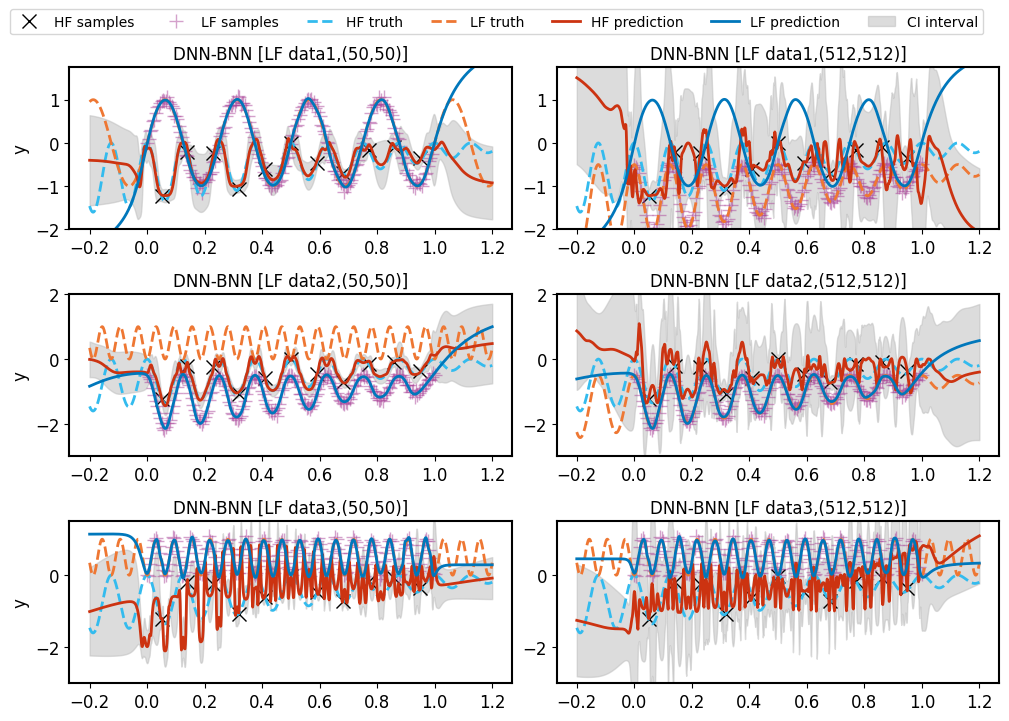

In [16]:
# plot the results into plots with 8 subplots


# # plot the prediction of mf-dnn-bnn on lf1 with order1
# axs[0, 1].plot(hf_samples, hf_responses, "kx", linewidth=2,
#                markersize=10,
#                label="HF samples",)
# axs[0, 1].plot(lf_samples, responses_lf1['lf'],
#                "+", color="#AA4499", linewidth=2,
#                markersize=10,
#                alpha=0.5,
#                label="LF samples",)
# axs[0, 1].plot(
#     test_samples.numpy(),
#     test_hf_responses_noiseless.numpy(),
#     "--",
#     color="#33BBEE",
#     linewidth=2,
#     label="HF truth",
# )
# # plot the lf truth
# axs[0, 1].plot(
#     test_samples.numpy(),
#     test_lf1_responses.numpy(),
#     "--", color="#EE7733",
#     linewidth=2,
#     label="LF truth",
# )

# axs[0, 1].plot(test_samples.numpy(),
#                mfbnn_lf1_order1_y,  "-",
#                color="#CC3311",
#                linewidth=2,
#                label="HF prediction",)
# axs[0, 1].plot(
#     test_samples.numpy(),
#     mfbnn_lf1_order1_ly.detach().numpy(),
#     "-", color="#0077BB",
#     linewidth=2,
#     label="LF prediction",
# )
# axs[0, 1].fill_between(
#     test_samples.flatten().numpy(),
#     (mfbnn_lf1_order1_y - 2 * mfbnn_lf1_order1_total_unc).reshape(-1),
#     (mfbnn_lf1_order1_y + 2 * mfbnn_lf1_order1_total_unc).reshape(-1),
#     alpha=0.5,
#     color="#BBBBBB",
#     label="CI interval",
# )

# # axs[0, 1].legend()
# axs[0, 1].set_title(r"DNN-LR$^1$-BNN (LF data 1)")
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
# plot hf samples
ax[0, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[0, 0].plot(lf_samples,
              responses_lf1['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[0, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[0, 0].plot(test_samples,
              test_lf1_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)


ax[0, 0].plot(test_samples,
              smf_bnn_lf1_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[0, 0].plot(test_samples, smf_bnn_lf1_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[0, 0].fill_between(test_samples.flatten(),
                      (smf_bnn_lf1_50_y - 2*smf_bnn_lf1_50_total_unc).flatten(),
                      (smf_bnn_lf1_50_y + 2*smf_bnn_lf1_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[0, 0].set_title("DNN-BNN [LF data1,(50,50)]")
# ax[0, 0].legend()

# plot the second model
ax[0, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[0, 1].plot(lf_samples,
              responses_lf2['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[0, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[0, 1].plot(test_samples,
              test_lf2_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)

# plot the prediction of 512
ax[0, 1].plot(test_samples,
              smf_bnn_lf1_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[0, 1].plot(test_samples, smf_bnn_lf1_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[0, 1].fill_between(test_samples.flatten(),
                      (smf_bnn_lf1_512_y - 2*smf_bnn_lf1_512_total_unc).flatten(),
                      (smf_bnn_lf1_512_y + 2*smf_bnn_lf1_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[0, 1].set_title("DNN-BNN [LF data1,(512,512)]")
# ax[0, 1].legend()

# plot the third model of lf2
ax[1, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[1, 0].plot(lf_samples,
              responses_lf2['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[1, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[1, 0].plot(test_samples,
              test_lf3_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)

# plot the prediction of 50
ax[1, 0].plot(test_samples,
              smf_bnn_lf2_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[1, 0].plot(test_samples, smf_bnn_lf2_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[1, 0].fill_between(test_samples.flatten(),
                      (smf_bnn_lf2_50_y - 2*smf_bnn_lf2_50_total_unc).flatten(),
                      (smf_bnn_lf2_50_y + 2*smf_bnn_lf2_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[1, 0].set_title("DNN-BNN [LF data2,(50,50)]")
# ax[1, 0].legend()

# plot the third model of lf2
ax[1, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[1, 1].plot(lf_samples,
              responses_lf2['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[1, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[1, 1].plot(test_samples,
              test_lf2_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)

# plot the prediction of 512
ax[1, 1].plot(test_samples,
              smf_bnn_lf2_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[1, 1].plot(test_samples, smf_bnn_lf2_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[1, 1].fill_between(test_samples.flatten(),
                      (smf_bnn_lf2_512_y - 2*smf_bnn_lf2_512_total_unc).flatten(),
                      (smf_bnn_lf2_512_y + 2*smf_bnn_lf2_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[1, 1].set_title("DNN-BNN [LF data2,(512,512)]")
# ax[1, 1].legend()

# plot the third model of lf3
ax[2, 0].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[2, 0].plot(lf_samples,
              responses_lf3['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[2, 0].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[2, 0].plot(test_samples,
              test_lf3_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)

# plot the prediction of 50
ax[2, 0].plot(test_samples,
              smf_bnn_lf3_50_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[2, 0].plot(test_samples, smf_bnn_lf3_50_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)
# uncertainty  of hf
ax[2, 0].fill_between(test_samples.flatten(),
                      (smf_bnn_lf3_50_y - 2*smf_bnn_lf3_50_total_unc).flatten(),
                      (smf_bnn_lf3_50_y + 2*smf_bnn_lf3_50_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[2, 0].set_title("DNN-BNN [LF data3,(50,50)]")
# ax[2, 0].legend()

# plot the third model of lf3
ax[2, 1].plot(hf_samples.numpy(),
              hf_responses.numpy(),
              "kx", linewidth=2,
              markersize=10,
              label="HF samples",)
ax[2, 1].plot(lf_samples,
              responses_lf3['lf'],
              "+", color="#AA4499", linewidth=2,
              markersize=10,
              alpha=0.5,
              label="LF samples",)

ax[2, 1].plot(test_samples,
              test_hf_responses_noiseless,
              "--",
              color="#33BBEE",
              linewidth=2,
              label="HF truth",)
# plot the lf truth
ax[2, 1].plot(test_samples,
              test_lf3_responses,
              "--", color="#EE7733",
              linewidth=2,
              label="LF truth",)

# plot the prediction of 512
ax[2, 1].plot(test_samples,
              smf_bnn_lf3_512_y,
              "-",
              color="#CC3311",
              linewidth=2,
              label="HF prediction",)

ax[2, 1].plot(test_samples, smf_bnn_lf3_512_ly.detach().numpy(),
              "-", color="#0077BB",
              linewidth=2,
              label="LF prediction",)

# uncertainty  of hf
ax[2, 1].fill_between(test_samples.flatten(),
                      (smf_bnn_lf3_512_y - 2*smf_bnn_lf3_512_total_unc).flatten(),
                      (smf_bnn_lf3_512_y + 2*smf_bnn_lf3_512_total_unc).flatten(),
                      alpha=0.5,
                      color="#BBBBBB",
                      label="CI interval",
                      )
ax[2, 1].set_title("DNN-BNN [LF data3,(512,512)]")
# ax[2, 1].legend()
# plt.tight_layout()

# set the axis labels x for the bottom row and y for the left column
for ii in range(3):
    for jj in range(2):
        if ii == 3:
            ax[ii, jj].set_xlabel("x", fontsize=12)
        if jj == 0:
            ax[ii, jj].set_ylabel("y", fontsize=12)
# set the line width of the axes
for ii in range(3):
    for jj in range(2):
        ax[ii, jj].spines["top"].set_linewidth(1.5)
        ax[ii, jj].spines["right"].set_linewidth(1.5)
        ax[ii, jj].spines["left"].set_linewidth(1.5)
        ax[ii, jj].spines["bottom"].set_linewidth(1.5)
        # font size of the axis
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=12)

# set the limit of y for each row

for jj in range(2):
    ax[0, jj].set_ylim([-2, 1.75])
    ax[1, jj].set_ylim([-3, 2])
    ax[2, jj].set_ylim([-3, 1.5])
# set legende for the first subfigure  and put it outside the figure
ax[0, 1].legend(loc='upper left', bbox_to_anchor=(-1.25, 1.4), fontsize=10,
                frameon=True, ncol=7)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# save the figure
plt.savefig("net_influence_dnn_bnn.pdf", bbox_inches="tight", dpi=300)
plt.savefig("net_influence_dnn_bnn.png", bbox_inches="tight", dpi=300)
plt.show()